<a href="https://colab.research.google.com/github/mymess/Jupyter-Notebooks/blob/master/Classification_Handwritten_digits_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The MNIST dataset

We will need this misc bloat. TODO: make a library or put it in a class.  

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True):
  if not os.path.isdir( IMAGES_PATH ):
    os.makedirs( IMAGES_PATH )
  path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format='png', dpi=300)

In [0]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

##Download the MNIST dataset and take an overview of it 

The MNIST dataset is a set of 70,000 small images of digits
handwritten by high school students and employees of the US Census Bureau. Let's download it using Scikit Learn. 

In [0]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')


Now, we will store the data in a matrix and the target (we are doing supervised learning) in a vector:

In [8]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

Datasets loaded using Scikit come with handful DESCR key that describes the dataset. Let's take a quick look at it:

In [9]:
desc = mnist["DESCR"]
print (desc)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Let's see how a random number looks like:

Saving figure some_digit_plot


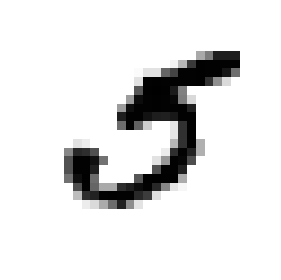

In [10]:
five_number_id = 36000 
five_digit = X[ five_number_id ]
five_digit_image = five_digit.reshape(28, 28)
plt.imshow(five_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

It looks like a five. Let's check it to be 100% sure:

In [11]:
print (y[five_number_id])


5


##Create train set and test set

The first 60,000 digits will be our train set, the rest (10,000) will be our test set. We will store the train set and test set in the `X_train` and `X_test` matrix respectively, and the target values of the train set and test set in the `y_train` and `y_test` vectors respectively.

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

We also need to shuffle the train set to ensure that all cross-validation folds will be similar. Moreover, some learning algorithms are sensitive to the
order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen:

In [0]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#Training a binary classifier using a Stochastic Gradient Descent Classifier

Let's create a binary classifier, i. e., a classifier that tells us whether a given image of a digit is a given number or not. For simplification, let's use the number five we used earlier. To do this, we create two boolean vectors that tell us whether the target values are a five or not:

In [0]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

Now we can train the classifier. We will use the Stochastic Gradient Descent
(SGD) classifier, using Scikit-Learn’s `SGDClassifier` class. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning), as we will see later. Let’s create an `SGDClassifier` and train it on the whole training set. We will first pass to the constructor a `random_state` parameter as the `SGDClassifier` relies on randomness during training (hence the name “stochastic”).This is done to get reproducible results. Next we train the model using the `fit` method. We pass the `X_train` matrix with the digits, and the `y_train_5` boolean vector containing the target values (the solution) for the training set.

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Now that our binay classifier is trained, let's test it:

In [16]:
sgd_clf.predict([five_digit])

array([ True])

Looks good. Let's play a littlebit and test it with a non-five digit. Let's make it a bit complicated and do try it with the eight digit:

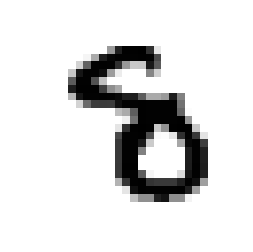

In [17]:
eight_number_id = 50000 
eight_digit = X[ eight_number_id ]
eight_digit_image = eight_digit.reshape(28, 28)
plt.imshow(eight_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

Now let's test our binary classifier with this digit:

In [18]:
sgd_clf.predict([eight_digit])

array([False])

It seems that it works. Cool!

#Evaluating a classifier's performance

##Measuring performance using Cross-Validation

We can use the `cross_val_score()` function to evaluate the `SGDClassifier` model. using K-fold crossvalidation,
with three folds. K-fold cross-validation means splitting the training set into
K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds:

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9613, 0.9635, 0.9661])

Wow! Above 96% accuracy seems too good to be true. But now let's implement a simple class inheriting `BaseEstimator` that classifies digits into non-5 digits:

In [0]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

With this class we will be able to check how many non-5 instances are in our folds.

In [21]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

About 90% seems logical, as only about 10% af all digits are five-digits. 

This demonstrates why accuracy is generally not the preferred performance measure for classifiers,
especially when you are dealing with *skewed datasets* (i.e., when some classes are much more frequent
than others).

##Using the Confusion Matrix

The
general idea is to count the number of times instances of class A are classified as class B. For example, to
know the number of times the classifier confused images of 5s with 3s, we would look in the 5th row and
3rd column of the confusion matrix.

To compute the confusion matrix, we first need to have a set of predictions, so they can be compared to the actual targets. We could make predictions on the test set, but let’s keep it untouched for now
(remember that we want to use the test set only at the very end of our project, once our classifier is ready to launch). Instead, we can use the `cross_val_predict()` function:

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Just like the `cross_val_score()` function, `cross_val_predict()` performs K-fold cross-validation,
but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means
that we can get a clean prediction for each instance in the training set (“clean” meaning that the prediction is
made by a model that never saw the data during training).
Now we are ready to get the confusion matrix using the `confusion_matrix()` function. We just need to pass it the
target classes (`y_train_5`) and the predicted classes (`y_train_pred`):

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
print("Confusion matrix = \n{0}".format(str(cm)))

Confusion matrix = 
[[54122   457]
 [ 1725  3696]]


What this means is:
>$Confusion Matrix=
 \begin{pmatrix}
  TN=54122 & FP=457  \\
  FN=1725 & TP=3696 
 \end{pmatrix}$

where: TN means *True Negatives*, FP means *False Positives*, FN means *False Negatives* and TP means *True Positives*. 

Each row in a confusion matrix represents an **actual class**, while each column represents a **predicted class**. The first row of this matrix considers non-5 images (the negative class): 54,122 of them were
correctly classified as non-5s (they are called true negatives), while the remaining 457 were wrongly
classified as 5s (false positives). The second row considers the images of 5s (the positive class): 1,725
were wrongly classified as non-5s (false negatives), while the remaining 3,696 were correctly classified
as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its
confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):

![texto alternativo](https://drive.google.com/uc?id=1FgkNT5EsBYZSDDOPID1ALM2tG0_HvRPp)

One big handicap of the confusion matrix is that all values are absolute ones: the count of true negatives, false positives and so on. The confusion matrix also gives a lot of information, but most times we may prefer a more concise metric. 
An interesting one to look at is **the accuracy of the positive predictions**; this is called the **precision**, **specifity** or **True Negative Rate** (i.e. "**especifidad**" in Spanish) of the
classifier. Thus:

>$ TNR=precision=\frac{TN}{TN+FP}$

Precision is typically used along with another metric named **recall** ("**sensibilidad**"), also called
**sensitivity or true positive rate (TPR)**: this is the **ratio of positive instances that are correctly detected** by
the classifier:

>$TPR=recall=\frac{TP}{TP+FN}$

In [24]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)
recall = recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)

print("precision = {:.2f}%".format(precision *100))
print("recall = {:.2f}%".format( recall*100) )


precision = 89.00%
recall = 68.18%


Now our 5-detector does not look as shiny as it did when we looked at its accuracy. When it claims an
image represents a 5, it is correct only 89% of the time. Moreover, it only detects 68% of the 5s.

It is often convenient to combine precision and recall into a single metric called the ***F1 score***, in
particular if you need a simple way to compare two classifiers. The F1 score is the **harmonic mean of
precision and recall**, and is defined as:


>$ F score=\frac{2}{\frac{1}{precision}+{\frac{1}{recall}}}$

Whereas the regular mean treats all values equally, the harmonic
mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if **both** recall and precision are high. 

The F1 score favors classifiers that have similar precision and recall. This is not always what we want:
in some contexts we mostly may need precision, and in other contexts what we really need is recall. For
example, if we trained a classifier to detect videos that are safe for kids, we would probably prefer a
classifier that rejects many good videos (low recall/sensitivity) but keeps only safe ones (high precision/specifity), rather than
a classifier that has a much higher recall but lets a few really bad videos show up in your product (in such
cases, you may even want to add a human pipeline to check the classifier’s video selection). On the other
hand, suppose we trained a classifier to detect shoplifters on surveillance images: it is probably fine if your
classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few
false alerts, but almost all shoplifters will get caught).

Unfortunately, it's impossible have it both ways: increasing precision reduces recall, and vice versa. This is
called the **precision/recall tradeoff**.

##The Precision/Recall tradeoff

To understand this tradeoff, let’s look at how the `SGDClassifier` makes its classification decisions. For
each instance, it computes a score based on a decision function, and if that score is greater than a
threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.
shows a few digits positioned from the lowest score on the left to the highest score on the right. Suppose
the decision threshold is positioned at the central arrow (between the two 5s): you will find 4 true
positives (actual 5s) on the right of that threshold, and one false positive (actually a 6). Therefore, with
that threshold, the precision is 80% (4 out of 5). But out of 6 actual 5s, the classifier only detects 4, so the
recall is 67% (4 out of 6). Now if you raise the threshold (move it to the arrow on the right), the false
positive (the 6) becomes a true negative, thereby increasing precision (up to 100% in this case), but one
true positive becomes a false negative, decreasing recall down to 50%. Conversely, lowering the
threshold increases recall and reduces precision.

![Precission vs Recall tradeoff and decision threshold](https://drive.google.com/uc?id=1kOXQBt0LRp0qaKe1q8ABELIr4o76He3Y) 

Scikit-Learn does not let us set the threshold directly, but it does give us access to the decision scores
that it uses to make predictions. Instead of calling the classifier’s `predict()` method, you can call its
`decision_function()` method, which returns a score for each instance, and then make predictions based
on those scores using any threshold you want:

In [25]:
y_score = sgd_clf.decision_function([five_digit])
print(y_score)

threshold = 0
y_five_digit_pred = (y_score > threshold)
print(y_five_digit_pred)

[5220.50278623]
[ True]


The `SGDClassifier` uses a threshold equal to 0, so the previous code returns the same result as the
predict() method (i.e., True). If we raised the threshold, this would change:

In [26]:
threshold = 6000
y_five_digit_pred = (y_score > threshold)
y_five_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the
classifier detects it when the threshold is 0, but it misses it when the threshold is increased to 6,000.
So how can we decide which threshold to use? For this we will first need to get the scores of all
instances in the training set using the `cross_val_predict()` function again, but this time specifying that
you want it to return decision scores instead of predictions:

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
y_scores


array([ -20459.8132648 , -128135.95428981,  -39453.27540023, ...,
        -45296.1297672 ,  -29061.21602769,  -13530.44145905])

Now with these scores we can compute precision and recall for all possible thresholds using the
`precision_recall_curve()` function:

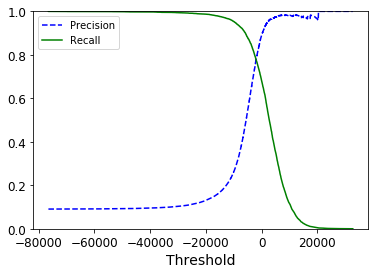

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Now we can simply select the threshold value that gives us the best precision/recall tradeoff for our
task. Another way to select a good precision/recall tradeoff is to plot precision directly against recall:

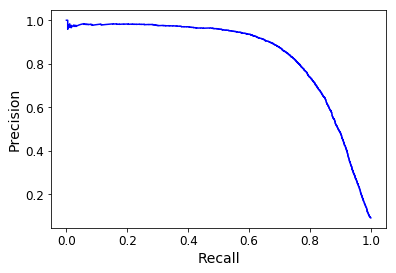

In [29]:
def plot_precision_vs_recall( precisions, recalls ):
  plt.plot(recalls, precisions, "b-", label="Precision_vs_recall")
  plt.ylabel("Precision")
  plt.xlabel("Recall")
  plt.show()

plot_precision_vs_recall( precisions, recalls )

We can see that precision really starts to fall sharply around 80% recall. We will probably want to
select a precision/recall tradeoff just before that drop — for example, at around 60% recall. But of
course the choice depends on the project.
So let’s suppose we decide to aim for a given precision, let's say 90%:

In [30]:
def get_threshold_for_precision(precisions, thresholds, target_precision):
  target_threshold = 0
  for i in range(len(precisions)-1):
    aux  = precisions[i]
    aux2 = precisions[i+1]
    if aux < target_precision and aux2 > target_precision:
      target_threshold = thresholds[i]
      
      break
  return target_threshold

target_threshold = get_threshold_for_precision(precisions, thresholds, .9)

y_train_pred = (y_scores > target_threshold)

print ("target threshold = ", target_threshold)
print("Precision = {:.2f}%".format( precision_score(y_train_5, y_train_pred) *100) )

print("Recall = {:.2f}%".format(recall_score(y_train_5, y_train_pred)*100))


target threshold =  265.9526351120646
Precision = 90.01%
Recall = 66.80%


Analogously, we may define a function that get's our desired threshold for a given recall:

In [31]:
def get_threshold_for_recall(recalls, thresholds, target_recall):
  target_threshold = 0
  for i in range(len(recalls)-1):
    aux  = recalls[i]
    aux2 = recalls[i+1]
    if aux2 < target_recall and aux > target_recall:
      target_threshold = thresholds[i+1]      
      break
  return target_threshold

target_threshold = get_threshold_for_recall(recalls, thresholds, .9)

y_train_pred = (y_scores > target_threshold)

print ("target threshold = ", target_threshold)

print("Precision = {:.2f}%".format( precision_score(y_train_5, y_train_pred) *100) )

print("Recall = {:.2f}%".format(recall_score(y_train_5, y_train_pred)*100))


target threshold =  -5782.976627732644
Precision = 48.36%
Recall = 89.96%


##The ROC Curve

The **Receiver Operating Characteristic (ROC) curve** is another common tool used with binary classifiers.
It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
curve plots the **true positive rate** (another name for recall) against the **false positive rate**. The **FPR** is the
ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the **true
negative rate**, which is the ratio of negative instances that are correctly classified as negative. The TNR
is also called specificity. Hence the ROC curve plots *sensitivity* (recall) versus *1 – specificity*.
To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the
`roc_curve()` function:

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Then you can plot the FPR against the TPR using Matplotlib.

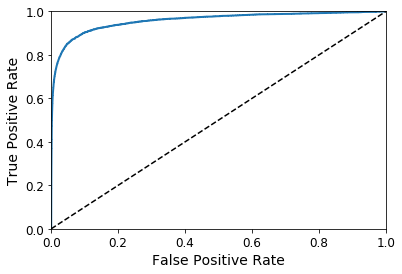

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays
as far away from that line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will
have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
Scikit-Learn provides a function to compute the ROC AUC:

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9577210519742373

##Summing it all up in one class

Now we have a ton of sparse code for calculating the confusion matrix and Precision/Recall charts. Let's put it all together in one class:

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


class ClassifierPerformanceMeter(object):
  #data, y target values
  def __init__(self, classifier, X, y):
    self.classifier = classifier
    self.X = X
    self.y = y
    
    if isinstance(classifier, RandomForestClassifier):
      y_probas_forest = cross_val_predict(self.classifier, self.X, self.y, cv=3,
      method="predict_proba")
      self.y_scores = y_probas_forest[:, 1] # score = proba of positive class

    else:
      self.classifier.fit(X, y)
      self.y_scores = cross_val_predict(self.classifier, self.X, self.y, cv=3,
      method="decision_function")      
      
    self.precisions, self.recalls, self.thresholds = precision_recall_curve(self.y, self.y_scores)
    self.fpr, self.tpr, self.auc_thresholds = roc_curve(self.y, self.y_scores)      
    self.roc_auc_score = roc_auc_score(self.y, self.y_scores)    
     
  def describe(self):
    self.y_train_pred = cross_val_predict(self.classifier, self.X, self.y, cv=3)
    cm = confusion_matrix(self.y, self.y_train_pred)
    print("Confusion matrix = \n{0}".format(str(cm)))

    precision = precision_score(self.y, self.y_train_pred)
    recall = recall_score(self.y, self.y_train_pred)
    print("\nPrecision = {:.2f}%".format(precision *100))
    print("Recall = {:.2f}%".format( recall*100) )
    print("\nAUC = {:.6f}".format( self.roc_auc_score) )
    

  def plot_precision_recall_vs_threshold(self):
    plt.plot(self.thresholds, self.precisions[:-1], "b--", label="Precision")
    plt.plot(self.thresholds, self.recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()
  
  def plot_precision_vs_recall( self ):
    plt.plot(self.recalls, self.precisions, "b-", label="Precision_vs_recall")
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.show()
    
  def plot_roc_curve(self, label=None):
    plt.plot(self.fpr, self.tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
  
  
  def get_threshold_for_precision(self, target_precision):
    target_threshold = 0
    for i in range(len(self.precisions)-1):
      aux  = self.precisions[i]
      aux2 = self.precisions[i+1]
      if aux < target_precision and aux2 > target_precision:
        target_threshold = self.thresholds[i]
        break
        
    return target_threshold

  def get_threshold_for_recall(self, target_recall):
    target_threshold = 0
    for i in range(len(self.recalls)-1):
      aux  = self.recalls[i]
      aux2 = self.recalls[i+1]
      if aux2 < target_recall and aux > target_recall:
        target_threshold = self.thresholds[i+1]      
        break
    return target_threshold;
  



Now let's test the class with a `SGDClassifier`:

Confusion matrix = 
[[54122   457]
 [ 1725  3696]]

Precision = 89.00%
Recall = 68.18%

AUC = 0.957721


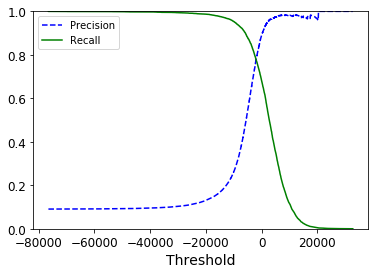

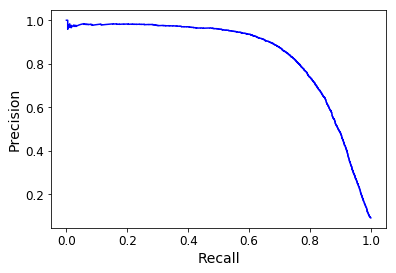

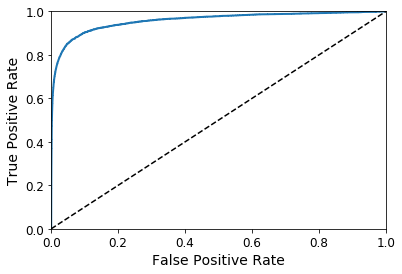

target threshold =  265.9526351120646
Precision = 90.01%
Recall = 66.80%
target threshold =  -5782.976627732644
Precision = 48.36%
Recall = 89.96%


In [36]:
meter = ClassifierPerformanceMeter(sgd_clf, X_train, y_train_5);  
meter.describe();
meter.plot_precision_recall_vs_threshold()
meter.plot_precision_vs_recall()
meter.plot_roc_curve("ROC curve");

target_threshold = meter.get_threshold_for_precision(0.9)

y_train_pred = (y_scores > target_threshold)

print ("target threshold = ", target_threshold)
print("Precision = {:.2f}%".format( precision_score(y_train_5, y_train_pred) *100) )
print("Recall = {:.2f}%".format(recall_score(y_train_5, y_train_pred)*100))


target_threshold = meter.get_threshold_for_recall(0.9)
y_train_pred = (y_scores > target_threshold)
print ("target threshold = ", target_threshold)
print("Precision = {:.2f}%".format( precision_score(y_train_5, y_train_pred) *100) )
print("Recall = {:.2f}%".format(recall_score(y_train_5, y_train_pred)*100))





Let's test the class with a `RandomForestClassifier`:

Confusion matrix = 
[[54512    67]
 [  931  4490]]

Precision = 98.53%
Recall = 82.83%

AUC = 0.993124


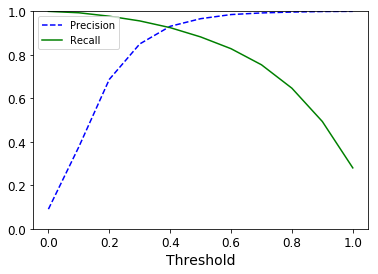

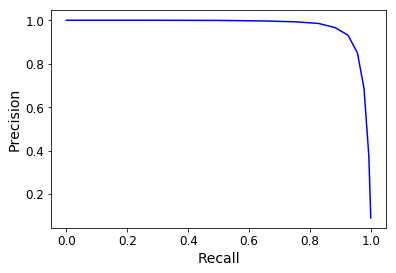

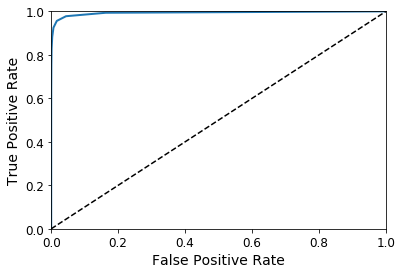

In [37]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

meter = ClassifierPerformanceMeter(forest_clf, X_train, y_train_5)
meter.describe();
meter.plot_precision_recall_vs_threshold()
meter.plot_precision_vs_recall()
meter.plot_roc_curve("ROC curve");

# Multiclass Classification

Whereas *binary classifiers* distinguish between two classes, *multiclass classifiers* (also called
*multinomial classifiers*) can distinguish between more than two classes.

Some algorithms (such as *Random Forest* classifiers or naive Bayes classifiers) are capable of handling
multiple classes directly. Others (such as *Support Vector Machine* classifiers or Linear classifiers) are
strictly binary classifiers. However, there are various strategies that you can use to perform multiclass
classification using multiple binary classifiers.

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is
to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then
when you want to classify an image, you get the decision score from each classifier for that image and you
select the class whose classifier outputs the highest score. This is called the **one-versus-all (OvA)**
strategy (also called one-versus-the-rest).

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s,
another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the **one-versus-one**
(**OvO**) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST
problem, this means training 45 binary classifiers! When you want to classify an image, you have to run
the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO
is that each classifier only needs to be trained on the part of the training set for the two classes that it must
distinguish.

Some algorithms (such as *Support Vector Machine* classifiers) scale poorly with the size of the training
set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training
sets than training few classifiers on large training sets. For most binary classification algorithms,
however, **OvA** is preferred.

Scikit-Learn detects when we try to use a binary classification algorithm for a multiclass classification
task, and it **automatically runs OvA** (except for SVM classifiers for which it uses OvO). Let’s try this with the `SGDClassifier`:

In [38]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([five_digit])

array([5], dtype=int8)

That was easy! This code trains the `SGDClassifier` on the training set using the original target classes
from 0 to 9 (`y_train`, i.e. it runs **OvA automatically**), instead of the 5-versus-all target classes (`y_train_5`). Then it makes a prediction
(a correct one in this case). Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their
decision scores for the image, and selected the class with the highest score.

To see that this is indeed the case, you can call the `decision_function()` method. Instead of returning
just one score per instance, it now returns 10 scores, one per class, having the 6th element in the array (0,1,2,3,4,5) the only positive score:

In [39]:
digit_scores = sgd_clf.decision_function([five_digit])
digit_scores

array([[ -8204.47519778, -19206.28224706,  -5702.10113982,
         -4666.3653033 , -15827.7809826 ,   1782.52380291,
        -39807.3747045 , -18945.8333413 , -14650.34384565,
        -16166.06981109]])

To get the highest score, just do:

In [40]:
maxId = np.argmax(digit_scores)
print("The largest value has the index ", maxId )
print("which corresponds to the digit '{0}'".format(sgd_clf.classes_[ maxId ]))

The largest value has the index  5
which corresponds to the digit '5'


Training a `RandomForestClassifier` is just as easy:

In [41]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([five_digit])

array([5], dtype=int8)

This time Scikit-Learn did not have to run OvA or OvO because `Random Forest` classifiers can directly
classify instances into multiple classes. You can call `predict_proba()` to get the list of probabilities that
the classifier assigned to each instance for each class:

In [42]:
digit_probs = forest_clf.predict_proba([five_digit]) 
print(digit_probs)

maxId = np.argmax(digit_probs)
print("The largest probability value has the index ", maxId )
print("which corresponds to the digit '{0}'".format(forest_clf.classes_[ maxId ]))


[[0.1 0.  0.  0.1 0.  0.8 0.  0.  0.  0. ]]
The largest probability value has the index  5
which corresponds to the digit '5'


Now of course we want to evaluate these classifiers. As usual, we will use cross-validation, so let’s
evaluate the `SGDClassifier`’s accuracy using the `cross_val_score()` function:

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86762647, 0.88469423, 0.8306746 ])

It gets over 83% on all test folds. If we used a random classifier, we would get 10% accuracy, so this is
not such a bad score, but we can still do much better. For example, simply scaling the inputs increases accuracy above 90%:

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.89982004, 0.90534527, 0.90153523])

# Error Analysis with a grayscale Confusion Matrix

Of course, if this were a real project, we would follow the steps in the Machine Learning project
checklist:

1.   exploring data preparation options
2.   trying out multiple models
3.   shortlisting the best ones
4.   fine-tuning their hyperparameters using `GridSearchCV` 
5.   and automating as much as possible. 

Here, we will assume that we have found a promising model
and we want to find ways to improve it. 
One way to do this is to analyze the types of errors it makes.
First, we can look at the confusion matrix. We need to make predictions using the
`cross_val_predict()` function, then call the `confusion_matrix()` function, just like you did earlier:

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5597,    0,   15,    9,   10,   43,   36,    5,  207,    1],
       [   1, 6419,   41,   22,    3,   45,    4,    8,  186,   13],
       [  23,   25, 5267,   91,   71,   27,   64,   45,  334,   11],
       [  30,   20,  113, 5277,    2,  202,   26,   45,  349,   67],
       [  10,   18,   39,   11, 5254,    9,   39,   21,  280,  161],
       [  30,   20,   26,  158,   53, 4499,   75,   21,  476,   63],
       [  28,   18,   43,    5,   37,   96, 5552,    7,  132,    0],
       [  20,   10,   55,   27,   48,   11,    4, 5721,  160,  209],
       [  19,   71,   39,  111,    1,  127,   28,   10, 5398,   47],
       [  24,   23,   29,   60,  126,   34,    1,  188,  314, 5150]])

Wow! That’s a lot of numbers. It’s often more convenient to look at an image representation of the confusion
matrix, using Matplotlib’s `matshow()` function:

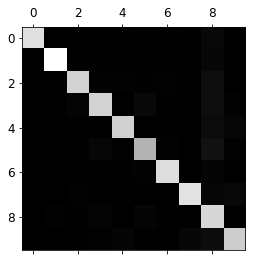

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal, which means that
most were classified correctly. The 5s look slightly darker than the other digits, which could mean that
there are fewer images of 5s in the dataset or that the classifier does not perform as well on 5s as on other
digits. In fact, you can verify that both are the case.
Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the
number of images in the corresponding class, so you can compare error rates instead of absolute number
of errors (which would make abundant classes look unfairly bad):

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:

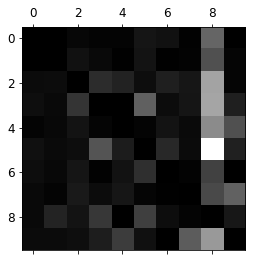

In [50]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Now we can clearly see the kinds of errors the classifier makes. **Remember that rows represent actual classes, while columns represent predicted classes**. The columns for classes 8 and 9 are quite bright,
which tells you that many images get misclassified as 8s or 9s. Similarly, the rows for classes 8 and 9 are
also quite bright, telling you that 8s and 9s are often confused with other digits. Conversely, some rows
are pretty dark, such as row 1: this means that most 1s are classified correctly (a few are confused with
8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for example, there are more 5s
misclassified as 8s than the reverse.

Analyzing the confusion matrix can often give you insights on ways to improve your classifier. Looking at
this plot, it seems that your efforts should be spent on improving classification of 8s and 9s, as well as
fixing the specific 3/5 confusion. For example, you could try to gather more training data for these digits.
Or you could engineer new features that would help the classifier — for example, writing an algorithm to
count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the
images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns stand out more, such as
closed loops.

Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and
why it is failing, but it is more difficult and time-consuming. For example, let’s plot examples of 3s and 5s
(the `plot_digits()` function just uses Matplotlib’s imshow() function):

In [0]:
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
  plt.axis("off")
  
  
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

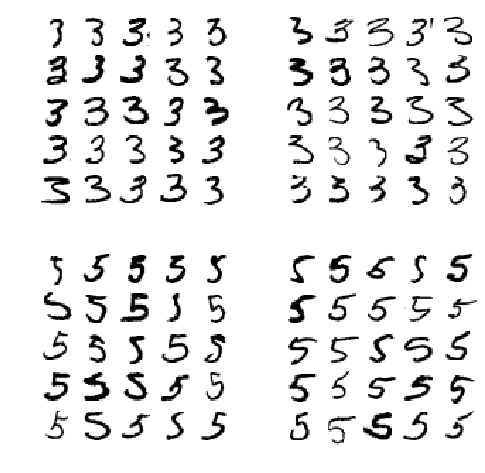

In [54]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

The two 5×5 blocks on the left show digits classified as 3s, and the two 5×5 blocks on the right show
images classified as 5s. Some of the digits that the classifier gets wrong (i.e., in the bottom-left and topright
blocks) are so badly written that even a human would have trouble classifying them (e.g., the 5 on
the 8th row and 1st column truly looks like a 3). 

However, most misclassified images seem like obvious
errors to us, and it’s hard to understand why the classifier made the mistakes it did.3 The reason is that we
used a simple `SGDClassifier`, which is a **linear model**. All it does is assign a weight per class to each
pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each
class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them.

The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom
arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and
vice versa. In other words, this classifier is quite sensitive to image shifting and rotation. So one way to
reduce the 3/5 confusion would be to preprocess the images to ensure that they are well centered and not
too rotated. This will probably help reduce other errors as well.

# Multilabel Classification

Until now each instance has always been assigned to just one class. In some cases you may want your
classifier to output **multiple classes** for each instance. For example, consider a face-recognition
classifier: what should it do if it recognizes several people on the same picture? Of course it should
attach one label per person it recognizes. Say the classifier has been trained to recognize three faces,
Alice, Bob, and Charlie; then when it is shown a picture of Alice and Charlie, it should output [1, 0, 1]
(meaning “Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple binary
labels is called a multilabel classification system.

We won’t go into face recognition just yet, but let’s look at a simpler example, just for illustration
purposes:

In [55]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

This code creates a y_multilabel array containing two target labels for each digit image: the first
indicates whether or not the digit is large (7, 8, or 9) and the second indicates whether or not it is odd.
The next lines create a **`KNeighborsClassifier`** instance (which supports multilabel classification, but
not all classifiers do) and we train it using the multiple targets array. Now you can make a prediction, and
notice that it outputs two labels.

In [56]:
knn_clf.predict([five_digit])

array([[False,  True]])

Which means it is not a large number (7, 8 or 9) and that is an odd number. We can now evaluate this classifier:

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on our project. For example, one approach is to measure the F1 score for each individual label (or any other
binary classifier metric discussed earlier), then simply compute the average score.

This code computes the average F1 score across all labels:

In [0]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

# Multilabel Classification to clean up noise in images

The last type of classification task we are going to discuss here is called multioutput-multiclass
classification (or simply multioutput classification). It is simply a generalization of multilabel
classification where each label can be multiclass (i.e., it can have more than two possible values).
To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit
image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just
like the MNIST images. 

Notice that the classifier’s output is multilabel (one label per pixel) and each
label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
classification system.


Let’s start by creating the training and test sets by taking the MNIST images and adding noise to their pixel
intensities using NumPy’s `randint()` function. The target images will be the original images:


In [0]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Let’s take a peek at an image from the test set (yes, we’re snooping on the test data, so you should be frowning right now):

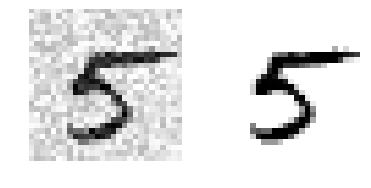

In [60]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
#save_fig("noisy_digit_example_plot")
plt.show()

On the left is the noisy input image, and on the right is the clean target image. Now let’s train the classifier and make it clean this image:

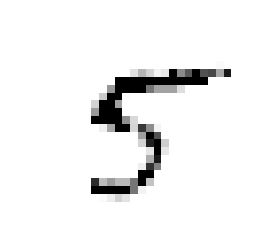

In [62]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
#save_fig("cleaned_digit_example_plot")

Looks close enough to the target! This concludes our tour of classification. Hopefully we should now be able to
know how to select good metrics for classification tasks, pick the appropriate precision/recall tradeoff, compare classifiers, and more generally build good classification systems for a variety of tasks.